In [1]:
# standard modules we will always use
import pandas as pd
import numpy as np
import scipy as sp
import mglearn
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
data1 = pd.read_csv("bitcoin.csv")
data1.head()
data1.columns = ['Date', 'Open','High','Low','Close','Volume','Market_Cap']

In [30]:
data = data1.drop(columns = ['Date'])

In [13]:
data.head()

,Open,High,Low,Close,Volume,Market_Cap
0,4156.92,4905.95,4155.32,4879.88,21315047816,85986009273
1,4105.36,4164.95,4096.90,4158.18,10157794171,73269368747
2,4105.46,4113.02,4094.10,4105.40,9045122443,72339379036
3,4092.14,4296.81,4053.91,4106.66,9732688060,72355190645
4,4068.30,4113.50,4034.10,4098.37,10918665557,72202088875


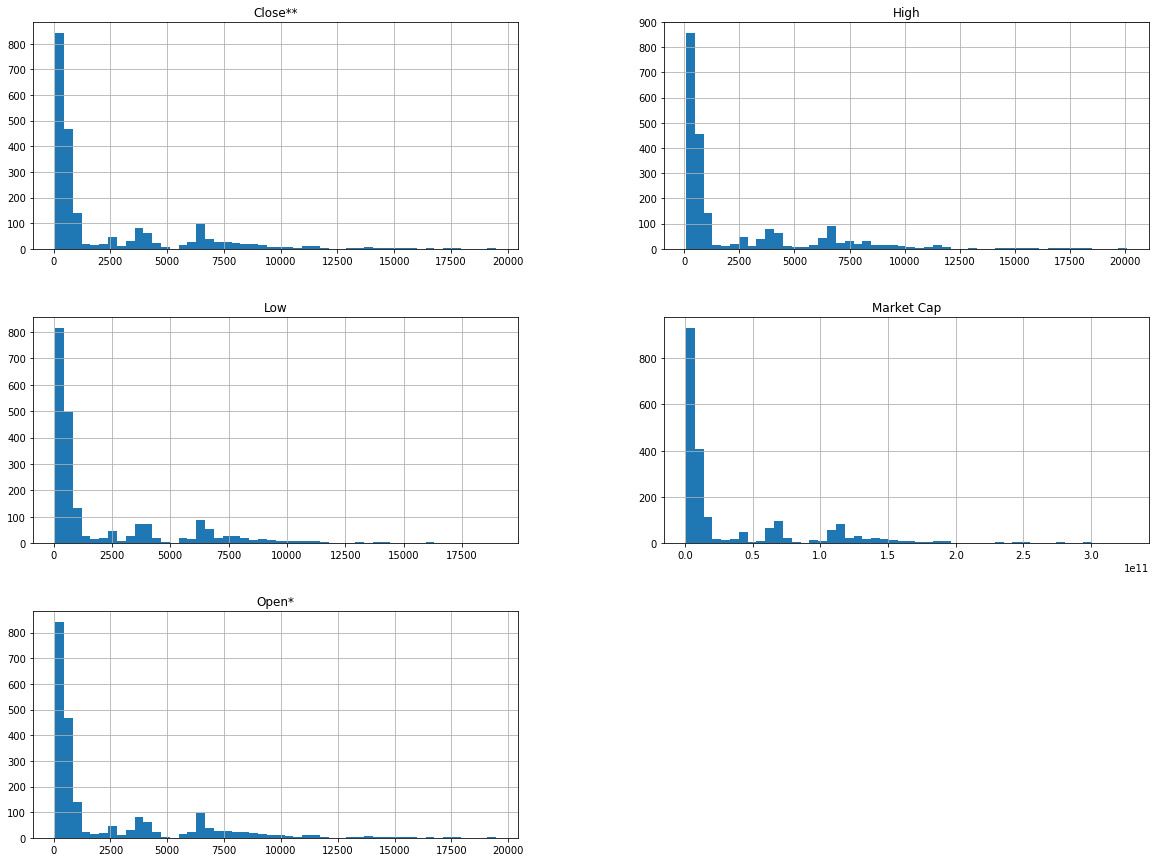

In [4]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin

Open_ix, Close_ix = 2 , 3

class DailyReturns(BaseEstimator, TransformerMixin):
    def __init__(self, daily_return = True): # no *args or **kargs
        self.daily_return = daily_return
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        daily_return = (X[:, Close_ix] - X[:, Open_ix])/X[: , Close_ix]
        return daily_return



In [17]:
attr_adder = DailyReturns(daily_return=False)
data_adder = attr_adder.transform(data.values)


In [14]:
# Feature scaling, use min-max scalling or standardization
# min-max affected by outliers where standardization is less so
# transformation pipelines
# use pipeline to help with ordering of executions!!!

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy ='median')),
    ('attribs_adder', DailyReturns()),
    ('std_scaler', StandardScaler()),
])
data_num = num_pipeline.fit_transform(data.values)

/home/adir/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


ValueError: could not convert string to float: '-'

In [63]:
data['Daily_Returns'] = (data['Close'] - data['Open'])/data['Open']

In [64]:
data.head()

,Open,High,Low,Close,Volume,Market_Cap,Daily_Returns
0,4156.92,4905.95,4155.32,4879.88,21315047816,85986009273,0.173917
1,4105.36,4164.95,4096.90,4158.18,10157794171,73269368747,0.012866
2,4105.46,4113.02,4094.10,4105.40,9045122443,72339379036,-0.000015
3,4092.14,4296.81,4053.91,4106.66,9732688060,72355190645,0.003548
4,4068.30,4113.50,4034.10,4098.37,10918665557,72202088875,0.007391


In [109]:
dr = data['Daily_Returns']*100
dr1 = np.array(dr).reshape(-1,1)
y = data1['Date']
#plt.scatter(dr, y)#
#plt.show()

In [110]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# from sklearn.lda import LDA
import matplotlib.cm as cm

In [122]:
y = dr1.T
print(y)
rcov = np.cov(y)


[[ 1.73917227e+01  1.28661067e+00 -1.46146839e-03 ... -3.47222222e+00
   7.51264505e+00 -8.05617147e-01]]


In [123]:
rcov

array(18.80538617)

In [69]:
drna = dr.dropna()

In [72]:
drna = pd.DataFrame(drna)
drna.info()
drna1 = np.array(drna)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2165
Data columns (total 1 columns):
Daily_Returns    2166 non-null float64
dtypes: float64(1)
memory usage: 33.8 KB


In [120]:
sklearn_pca = PCA(n_components=20) # let's look at the first 20 components
pc = sklearn_pca.fit_transform(rcov)

ValueError: n_components=20 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'